In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('Life Expectancy Data.csv')
df.head(2)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


REARRANGING COLUMN NAMES FOR EASY ACCESSIBILITY 

In [3]:
#df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('-', '_')
df.columns = df.columns.str.replace('/', '_')

Checking Dtype and Count of entries in columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Lifeexpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   infantdeaths                  2938 non-null   int64  
 6   Alcohol                       2744 non-null   float64
 7   percentageexpenditure         2938 non-null   float64
 8   HepatitisB                    2385 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2904 non-null   float64
 11  under_fivedeaths              2938 non-null   int64  
 12  Polio                         2919 non-null   float64
 13  Tot

Checking na values

In [5]:
df.isna().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under_fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV_AIDS                          0
GDP                             448
Population                      652
thinness1_19years                34
thinness5_9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64

Checking value counts for factor variables

In [6]:
for col in df.columns:
    print()
    print(df[col].value_counts())


Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64

2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: Year, dtype: int64

Developing    2426
Developed      512
Name: Status, dtype: int64

73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
        ..
43.1     1
49.5     1
49.0     1
55.1     1
45.4     1
Name: Lifeexpectancy, Length: 362, dtype: int64

12.0     34
14.0     30
16.0     29
11.0     25
138.0    25
         ..
666.0     1
675.0     1
654.0     1
633.0     1
665.0     1
Name: AdultMortality, Length: 425, dtype: int64

0      848
1  

converting factor variables to object type

In [7]:
df['Status']=df['Status'].astype(object)
df['Year']=df['Year'].astype(object)
df['Country']=df['Country'].astype(object)

Replacing Status with 0 and 1

In [8]:
df['Status'] = df['Status'].replace({'Developing': 0, 'Developed': 1})

Checking duplicated values

In [9]:
df.duplicated().sum()

0

Filling all na values with median (there are no na values in factor variables)

In [10]:
df.fillna(df.median(),inplace=True)

C:\Users\Rushabh\AppData\Local\Temp\ipykernel_12900\1048787520.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(),inplace=True)


Checking min max and mean using describe

In [11]:
df.describe()

,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,...,Polio,Totalexpenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness1_19years,thinness5_9years,Incomecompositionofresources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,0.174268,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,...,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,0.379405,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,...,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,0.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,...,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,0.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,...,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,0.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,...,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,...,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Conforming fillna by checking isna again

In [12]:
df.isna().sum()

Country                         0
Year                            0
Status                          0
Lifeexpectancy                  0
AdultMortality                  0
infantdeaths                    0
Alcohol                         0
percentageexpenditure           0
HepatitisB                      0
Measles                         0
BMI                             0
under_fivedeaths                0
Polio                           0
Totalexpenditure                0
Diphtheria                      0
HIV_AIDS                        0
GDP                             0
Population                      0
thinness1_19years               0
thinness5_9years                0
Incomecompositionofresources    0
Schooling                       0
dtype: int64

In [13]:
df.head(10)

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness1_19years,thinness5_9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,0,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,0,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,0,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,0,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,0,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [14]:
df.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under_fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness1_19years',
       'thinness5_9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [15]:
#sns.pairplot(df.sample(1000))
#img = plt.imread('PAIRPLOTEEED.png')
#plt.imshow(img)

One hot encoding or get dummies on factor variable

In [16]:
df=pd.get_dummies(df,columns=['Status'])
df

,Country,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,...,Diphtheria,HIV_AIDS,GDP,Population,thinness1_19years,thinness5_9years,Incomecompositionofresources,Schooling,Status_0,Status_1
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,0
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1,0
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1,0
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1,0
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,1,0
2934,Zimbabwe,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,1,0
2935,Zimbabwe,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,1,0
2936,Zimbabwe,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,1,0


Label Encoder on Country to change name to number

In [17]:
le = preprocessing.LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])

In [18]:
df

,Country,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,...,Diphtheria,HIV_AIDS,GDP,Population,thinness1_19years,thinness5_9years,Incomecompositionofresources,Schooling,Status_0,Status_1
0,0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,0
1,0,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1,0
2,0,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1,0
3,0,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1,0
4,0,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,1,0
2934,192,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,1,0
2935,192,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,1,0
2936,192,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,1,0


COUNTRY,YEAR,STATUS are Factor variables.

In [19]:
df1=pd.DataFrame()

Storing scaled values in new dataframe

In [20]:
scale=StandardScaler()
df1[['AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under_fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness1_19years',
       'thinness5_9years', 'Incomecompositionofresources', 'Schooling']]=scale.fit_transform(df[['AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under_fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness1_19years',
       'thinness5_9years', 'Incomecompositionofresources', 'Schooling']])
df1

,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under_fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness1_19years,thinness5_9years,Incomecompositionofresources,Schooling
0,0.792119,0.268824,-1.156989,-0.335570,-0.783807,-0.110384,-0.967349,0.255359,-3.279423,0.931485,-0.735391,-0.323445,-0.453371,0.435183,2.815209,2.775386,-0.737973,-0.585017
1,0.856601,0.285786,-1.156989,-0.334441,-0.914281,-0.168124,-0.992434,0.274060,-1.053699,0.939818,-0.862233,-0.323445,-0.451232,-0.183349,2.883439,2.819978,-0.752600,-0.615649
2,0.832421,0.302749,-1.156989,-0.334594,-0.827298,-0.173531,-1.017519,0.292761,-0.882489,0.918987,-0.777671,-0.323445,-0.449799,0.398066,2.928926,2.864570,-0.781853,-0.646281
3,0.864662,0.328193,-1.156989,-0.332096,-0.696824,0.032045,-1.042605,0.317696,-0.668478,1.081463,-0.650830,-0.323445,-0.446924,-0.120968,2.974413,2.931458,-0.815982,-0.676912
4,0.888843,0.345155,-1.156989,-0.367862,-0.653333,0.051757,-1.062673,0.342631,-0.625675,0.810670,-0.608549,-0.323445,-0.492539,-0.134268,3.042643,2.976051,-0.859862,-0.768808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,4.499850,-0.028022,-0.047657,-0.371433,-0.653333,-0.208332,-0.565984,-0.000223,-0.668478,0.502383,-0.735391,6.275044,-0.463141,0.047149,1.041221,1.013994,-1.089014,-0.860703
2934,4.435368,-0.036503,-0.124162,-0.371433,-3.306306,-0.123991,-0.586052,-0.006456,-3.236620,0.248255,-0.608549,6.885650,-0.463218,0.044490,1.132194,1.125475,-1.035383,-0.768808
2935,-0.739335,-0.044984,-0.029805,-0.371433,-0.435876,-0.184521,-0.606120,-0.012690,-0.411663,0.252421,-0.481708,7.496256,-0.493005,-0.187090,-0.823741,-0.791989,-0.991502,-0.615649
2936,4.201620,-0.044984,-0.720907,-0.371433,-0.305402,-0.164897,-0.626188,-0.018924,-0.283256,0.098278,-0.312585,7.949287,-0.456054,0.039533,-0.732768,-0.702805,-0.991502,-0.676912


Adding factor variables to the scaled dataframe

In [21]:
df1['Country']=df['Country']
df1['Year']=df['Year']
df1['Status_0']=df['Status_0']
df1['Status_1']=df['Status_1']
df1['Lifeexpectancy']=df['Lifeexpectancy']

Separating target and factors for train,test

In [22]:
Y=df1['Lifeexpectancy']
X=df1.drop(['Lifeexpectancy'],axis=1).astype('float64')

Using ElasticNet to check for variable that don't affect the target

In [23]:
alphas=10**np.linspace(10,-2,100)*0.5
elasticnetcv=ElasticNetCV(alphas=alphas)
elasticnetcv.fit(X,Y)

print(elasticnetcv.alpha_)

fitEN=ElasticNet(alpha=elasticnetcv.alpha_)
fitEN.fit(X,Y)
print(fitEN.coef_)
print(pd.Series(fitEN.coef_,index=X.columns))

0.005
[-2.49691269e+00  5.82747648e+00  1.88334388e-01  1.00263835e-01
 -4.06088538e-01 -2.57218226e-01  8.89475120e-01 -6.05899550e+00
  6.93038983e-01  1.63451865e-01  1.05580299e+00 -2.43915558e+00
  5.33706118e-01  8.49328962e-02 -3.24308666e-01  3.11819823e-02
  1.22069409e+00  2.18756282e+00  3.94000610e-03 -1.46481214e-02
 -7.36373003e-01  7.36362773e-01]
AdultMortality                 -2.496913
infantdeaths                    5.827476
Alcohol                         0.188334
percentageexpenditure           0.100264
HepatitisB                     -0.406089
Measles                        -0.257218
BMI                             0.889475
under_fivedeaths               -6.058995
Polio                           0.693039
Totalexpenditure                0.163452
Diphtheria                      1.055803
HIV_AIDS                       -2.439156
GDP                             0.533706
Population                      0.084933
thinness1_19years              -0.324309
thinness5_9years    

Using variance inflation factor to check for continuous variables that dont affect the target

In [24]:
x=df1[[ 'AdultMortality','infantdeaths','Alcohol', 'percentageexpenditure',
       'HepatitisB', 'Measles', 'BMI', 'under_fivedeaths', 'Polio',
       'Totalexpenditure', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Population',
       'thinness1_19years', 'thinness5_9years', 'Incomecompositionofresources',
       'Schooling' ]]
x=add_constant(x)


vif_df=pd.DataFrame()
vif_df['feature']=x.columns
vif_df['VIF']=[variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
print(vif_df)

                         feature         VIF
0                          const    1.000000
1                 AdultMortality    1.718038
2                   infantdeaths  177.181727
3                        Alcohol    1.589377
4          percentageexpenditure    5.737567
5                     HepatitisB    1.305980
6                        Measles    1.377767
7                            BMI    1.719067
8               under_fivedeaths  176.113622
9                          Polio    1.937826
10              Totalexpenditure    1.186037
11                    Diphtheria    2.155516
12                      HIV_AIDS    1.422386
13                           GDP    5.965483
14                    Population    1.489929
15             thinness1_19years    8.773122
16              thinness5_9years    8.869434
17  Incomecompositionofresources    2.985808
18                     Schooling    3.296186


dropped infantdeaths 177.181727

In [25]:
x=df1[[ 'AdultMortality','Alcohol', 'percentageexpenditure',
       'HepatitisB', 'Measles', 'BMI', 'under_fivedeaths', 'Polio',
       'Totalexpenditure', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Population',
       'thinness1_19years', 'thinness5_9years', 'Incomecompositionofresources',
       'Schooling' ]]
x=add_constant(x)


vif_df=pd.DataFrame()
vif_df['feature']=x.columns
vif_df['VIF']=[variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
print(vif_df)

                         feature       VIF
0                          const  1.000000
1                 AdultMortality  1.713250
2                        Alcohol  1.561978
3          percentageexpenditure  5.734718
4                     HepatitisB  1.299652
5                        Measles  1.375415
6                            BMI  1.718211
7               under_fivedeaths  2.193703
8                          Polio  1.931029
9               Totalexpenditure  1.185851
10                    Diphtheria  2.123133
11                      HIV_AIDS  1.417702
12                           GDP  5.953738
13                    Population  1.443327
14             thinness1_19years  8.768921
15              thinness5_9years  8.837276
16  Incomecompositionofresources  2.959614
17                     Schooling  3.292823


dropped thinness5_9years  8.837276

In [26]:
x=df1[[ 'AdultMortality','Alcohol', 'percentageexpenditure',
       'HepatitisB', 'Measles', 'BMI', 'under_fivedeaths', 'Polio',
       'Totalexpenditure', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Population',
       'thinness1_19years',  'Incomecompositionofresources',
       'Schooling' ]]
x=add_constant(x)


vif_df=pd.DataFrame()
vif_df['feature']=x.columns
vif_df['VIF']=[variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
print(vif_df)

                         feature       VIF
0                          const  1.000000
1                 AdultMortality  1.711980
2                        Alcohol  1.560140
3          percentageexpenditure  5.734332
4                     HepatitisB  1.299628
5                        Measles  1.373623
6                            BMI  1.695196
7               under_fivedeaths  2.166145
8                          Polio  1.930657
9               Totalexpenditure  1.182484
10                    Diphtheria  2.121085
11                      HIV_AIDS  1.416842
12                           GDP  5.950450
13                    Population  1.443197
14             thinness1_19years  1.957618
15  Incomecompositionofresources  2.959435
16                     Schooling  3.291948


dropped 12  GDP  5.950450


In [27]:
x=df1[[ 'AdultMortality','Alcohol', 'percentageexpenditure',
       'HepatitisB', 'Measles', 'BMI', 'under_fivedeaths', 'Polio',
       'Totalexpenditure', 'Diphtheria', 'HIV_AIDS',  'Population',
       'thinness1_19years',  'Incomecompositionofresources',
       'Schooling' ]]
x=add_constant(x)


vif_df=pd.DataFrame()
vif_df['feature']=x.columns
vif_df['VIF']=[variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
print(vif_df)

                         feature       VIF
0                          const  1.000000
1                 AdultMortality  1.709041
2                        Alcohol  1.551847
3          percentageexpenditure  1.252988
4                     HepatitisB  1.296415
5                        Measles  1.373533
6                            BMI  1.687975
7               under_fivedeaths  2.166145
8                          Polio  1.928647
9               Totalexpenditure  1.158244
10                    Diphtheria  2.121044
11                      HIV_AIDS  1.415957
12                    Population  1.443038
13             thinness1_19years  1.957541
14  Incomecompositionofresources  2.924365
15                     Schooling  3.285451


all are less than 5

In [28]:
df1

,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under_fivedeaths,Polio,Totalexpenditure,...,Population,thinness1_19years,thinness5_9years,Incomecompositionofresources,Schooling,Country,Year,Status_0,Status_1,Lifeexpectancy
0,0.792119,0.268824,-1.156989,-0.335570,-0.783807,-0.110384,-0.967349,0.255359,-3.279423,0.931485,...,0.435183,2.815209,2.775386,-0.737973,-0.585017,0,2015,1,0,65.0
1,0.856601,0.285786,-1.156989,-0.334441,-0.914281,-0.168124,-0.992434,0.274060,-1.053699,0.939818,...,-0.183349,2.883439,2.819978,-0.752600,-0.615649,0,2014,1,0,59.9
2,0.832421,0.302749,-1.156989,-0.334594,-0.827298,-0.173531,-1.017519,0.292761,-0.882489,0.918987,...,0.398066,2.928926,2.864570,-0.781853,-0.646281,0,2013,1,0,59.9
3,0.864662,0.328193,-1.156989,-0.332096,-0.696824,0.032045,-1.042605,0.317696,-0.668478,1.081463,...,-0.120968,2.974413,2.931458,-0.815982,-0.676912,0,2012,1,0,59.5
4,0.888843,0.345155,-1.156989,-0.367862,-0.653333,0.051757,-1.062673,0.342631,-0.625675,0.810670,...,-0.134268,3.042643,2.976051,-0.859862,-0.768808,0,2011,1,0,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,4.499850,-0.028022,-0.047657,-0.371433,-0.653333,-0.208332,-0.565984,-0.000223,-0.668478,0.502383,...,0.047149,1.041221,1.013994,-1.089014,-0.860703,192,2004,1,0,44.3
2934,4.435368,-0.036503,-0.124162,-0.371433,-3.306306,-0.123991,-0.586052,-0.006456,-3.236620,0.248255,...,0.044490,1.132194,1.125475,-1.035383,-0.768808,192,2003,1,0,44.5
2935,-0.739335,-0.044984,-0.029805,-0.371433,-0.435876,-0.184521,-0.606120,-0.012690,-0.411663,0.252421,...,-0.187090,-0.823741,-0.791989,-0.991502,-0.615649,192,2002,1,0,44.8
2936,4.201620,-0.044984,-0.720907,-0.371433,-0.305402,-0.164897,-0.626188,-0.018924,-0.283256,0.098278,...,0.039533,-0.732768,-0.702805,-0.991502,-0.676912,192,2001,1,0,45.3


In [29]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.20,random_state=123)
dftrain=pd.concat([Xtrain,Ytrain],axis=1)
dftest=pd.concat([Xtest,Ytest],axis=1)

Checking Ordinary Least Squares (OLS) and Pvalues for minimizing the sum of the squared differences between the observed and predicted values.

In [30]:
fit1=smf.ols('Lifeexpectancy~AdultMortality+Alcohol+percentageexpenditure+HepatitisB+Measles+BMI+under_fivedeaths+Polio+Totalexpenditure+Diphtheria+HIV_AIDS+Population+thinness1_19years+Incomecompositionofresources+Schooling+Country+Year+Status_0+Status_1',data=dftrain).fit()
fit1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,67.8850,26.701,2.542,0.011,15.526,120.244
AdultMortality,-2.5760,0.111,-23.120,0.000,-2.794,-2.357
Alcohol,-0.0044,0.117,-0.038,0.970,-0.233,0.224
percentageexpenditure,0.5782,0.098,5.918,0.000,0.387,0.770
HepatitisB,-0.3985,0.097,-4.113,0.000,-0.588,-0.208
Measles,-0.2584,0.100,-2.582,0.010,-0.455,-0.062
BMI,0.9767,0.113,8.648,0.000,0.755,1.198
under_fivedeaths,-0.3198,0.130,-2.462,0.014,-0.575,-0.065
Polio,0.7540,0.120,6.272,0.000,0.518,0.990
Totalexpenditure,0.1247,0.094,1.324,0.186,-0.060,0.309


Dropping highest pvalue in each iteration till all pvalues are less than 0.05

In [31]:
fit2=smf.ols('Lifeexpectancy~AdultMortality+percentageexpenditure+HepatitisB+Measles+BMI+under_fivedeaths+Polio+Totalexpenditure+Diphtheria+HIV_AIDS+Population+thinness1_19years+Incomecompositionofresources+Schooling+Country+Year+Status_0+Status_1',data=dftrain).fit()
fit2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,67.7263,26.359,2.569,0.010,16.036,119.417
AdultMortality,-2.5763,0.111,-23.218,0.000,-2.794,-2.359
percentageexpenditure,0.5780,0.098,5.927,0.000,0.387,0.769
HepatitisB,-0.3985,0.097,-4.114,0.000,-0.588,-0.209
Measles,-0.2585,0.100,-2.584,0.010,-0.455,-0.062
BMI,0.9766,0.113,8.649,0.000,0.755,1.198
under_fivedeaths,-0.3202,0.130,-2.471,0.014,-0.574,-0.066
Polio,0.7540,0.120,6.273,0.000,0.518,0.990
Totalexpenditure,0.1243,0.094,1.328,0.184,-0.059,0.308
Diphtheria,1.1133,0.126,8.866,0.000,0.867,1.360


In [32]:
fit3=smf.ols('Lifeexpectancy~AdultMortality+percentageexpenditure+HepatitisB+Measles+BMI+under_fivedeaths+Polio+Totalexpenditure+Diphtheria+HIV_AIDS+Population+thinness1_19years+Incomecompositionofresources+Schooling+Country+Status_0+Status_1',data=dftrain).fit()
fit3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,46.3072,0.131,352.234,0.000,46.049,46.565
AdultMortality,-2.5827,0.111,-23.335,0.000,-2.800,-2.366
percentageexpenditure,0.5794,0.097,5.943,0.000,0.388,0.771
HepatitisB,-0.3979,0.097,-4.108,0.000,-0.588,-0.208
Measles,-0.2538,0.100,-2.541,0.011,-0.450,-0.058
BMI,0.9757,0.113,8.643,0.000,0.754,1.197
under_fivedeaths,-0.3211,0.130,-2.479,0.013,-0.575,-0.067
Polio,0.7563,0.120,6.294,0.000,0.521,0.992
Totalexpenditure,0.1186,0.093,1.272,0.204,-0.064,0.302
Diphtheria,1.1083,0.125,8.837,0.000,0.862,1.354


In [33]:
fit4=smf.ols('Lifeexpectancy~AdultMortality+percentageexpenditure+HepatitisB+Measles+BMI+under_fivedeaths+Polio+Diphtheria+HIV_AIDS+Population+thinness1_19years+Incomecompositionofresources+Schooling+Country+Status_0+Status_1',data=dftrain).fit()
fit4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,46.3164,0.131,352.786,0.000,46.059,46.574
AdultMortality,-2.5838,0.111,-23.343,0.000,-2.801,-2.367
percentageexpenditure,0.5834,0.097,5.986,0.000,0.392,0.774
HepatitisB,-0.4009,0.097,-4.139,0.000,-0.591,-0.211
Measles,-0.2585,0.100,-2.590,0.010,-0.454,-0.063
BMI,0.9881,0.112,8.783,0.000,0.768,1.209
under_fivedeaths,-0.3189,0.130,-2.462,0.014,-0.573,-0.065
Polio,0.7553,0.120,6.285,0.000,0.520,0.991
Diphtheria,1.1166,0.125,8.914,0.000,0.871,1.362
HIV_AIDS,-2.4518,0.099,-24.728,0.000,-2.646,-2.257


In [34]:
fit5=smf.ols('Lifeexpectancy~AdultMortality+percentageexpenditure+HepatitisB+Measles+BMI+under_fivedeaths+Polio+Diphtheria+HIV_AIDS+thinness1_19years+Incomecompositionofresources+Schooling+Country+Status_0+Status_1',data=dftrain).fit()
fit5.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,46.3134,0.131,352.693,0.000,46.056,46.571
AdultMortality,-2.5860,0.111,-23.358,0.000,-2.803,-2.369
percentageexpenditure,0.5843,0.097,5.994,0.000,0.393,0.775
HepatitisB,-0.4132,0.097,-4.279,0.000,-0.602,-0.224
Measles,-0.2752,0.099,-2.772,0.006,-0.470,-0.080
BMI,0.9927,0.112,8.825,0.000,0.772,1.213
under_fivedeaths,-0.2199,0.113,-1.949,0.051,-0.441,0.001
Polio,0.7575,0.120,6.301,0.000,0.522,0.993
Diphtheria,1.1281,0.125,9.019,0.000,0.883,1.373
HIV_AIDS,-2.4529,0.099,-24.733,0.000,-2.647,-2.258


In [35]:
fit_train=smf.ols('Lifeexpectancy~AdultMortality+percentageexpenditure+HepatitisB+Measles+BMI+Polio+Diphtheria+HIV_AIDS+thinness1_19years+Incomecompositionofresources+Schooling+Country+Status_0+Status_1',data=dftrain).fit()
fit_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Lifeexpectancy   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     764.4
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        09:31:46   Log-Likelihood:                -6678.5
No. Observations:                2350   AIC:                         1.338e+04
Df Residuals:                    2336   BIC:                         1.347e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       46.3034      0.131    352.678      0.000      46.046      46.561
AdultMortality                  -2.5851      0.111    -23.335      0.000      -2.802      -2.368
percentageexpenditure            0.5839      0.098      5.986      0.000       0.393       0.775
HepatitisB                      -0.3922      0.096     -4.085      0.000      -0.580      -0.204
Measles                         -0.3638      0.088     -4.121      0.000      -0.537      -0.191
BMI                              0.9830      0.112      8.742      0.000       0.762       1.203
Polio                            0.7624      0.120      6.341      0.000       0.527       0.998
Diphtheria                       1.1315      0.125      9.041      0.000       0.886       1.377
HIV_AIDS                        -2.4430      0.099    -24.651      0.000      -2.637      -2.249
thinness1_19years               -0.3245      0.107     -3.039      0.002      -0.534      -0.115
Incomecompositionofresources     1.1512      0.143      8.069      0.000       0.871       1.431
Schooling                        2.2899      0.149     15.386      0.000       1.998       2.582
Country                          0.0031      0.002      2.034      0.042       0.000       0.006
Status_0                        22.3766      0.122    183.556      0.000      22.138      22.616
Status_1                        23.9268      0.184    130.024      0.000      23.566      24.288
==============================================================================
Omnibus:                      128.398   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              417.860
Skew:                          -0.194   Prob(JB):                     1.83e-91
Kurtosis:                       5.029   Cond. No.                     4.89e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.2e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
X1=Xtest[['AdultMortality',  'percentageexpenditure',
       'HepatitisB', 'Measles', 'BMI', 'Polio',
       'Diphtheria', 'HIV_AIDS', 
       'thinness1_19years',  'Incomecompositionofresources',
       'Schooling', 'Country', 'Status_0', 'Status_1']]

Predicting MSE from best fit model of smf.ols with rsquare of 0.810

In [37]:
predict=fit_train.predict(X1)
mse1=np.mean((dftest['Lifeexpectancy']-predict)**2)
mse1
print(r2_score(Ytest,predict))
print(mean_squared_error(Ytest,predict))

0.8119001130336597
16.939264176143254


Checking mse and R^2 from Kfold Cross Validation

In [38]:
model=lm.LinearRegression()
K=10
kfold=KFold(K,random_state=0,shuffle=True)
mse_cv=cross_val_score(model,x,Y,cv=kfold,scoring='neg_mean_squared_error')
print(np.mean(-mse_cv))
r2_cv=cross_val_score(model,x,Y,cv=kfold,scoring='r2')
print(np.mean(r2_cv))

17.58583330193519
0.8055306937403014


Checking mse and R^2 from LinearRegression (linearmodel)

In [39]:
model = lm.LinearRegression()
model.fit(Xtrain, Ytrain)

Ypred = model.predict(Xtest)

mse = mean_squared_error(Ytest, Ypred)
r2 = r2_score(Ytest, Ypred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 16.070725409904924
R-squared: 0.8215446903928938


Regression plot for prediction of life expectancy

<function matplotlib.pyplot.show(close=None, block=None)>

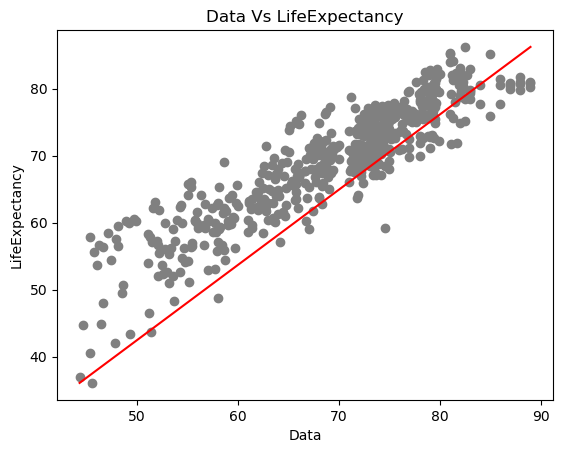

In [40]:
plt.scatter(Ytest, predict, color='gray')
x0 = min(Ytest)
x1 = max(Ytest)
y0 = min(predict)
y1 = max(predict)
plt.plot([x0,x1],[y0,y1],color="red")
plt.xlabel("Data")
plt.ylabel("LifeExpectancy")
plt.title("Data Vs LifeExpectancy")
plt.show